---
# Classificação de Demandas do Fala.BR - ChatGPT + Treino BERTimbau
---
## Projeto do Bootcamp Machine Learning (Anderson Monteiro e Léo Maranhão de Mello)


### Problema
O problema consiste em classificar as demandas recebidas pela Ouvidoria da SUSEP, por meio do sistema Fala.BR.

### Solução de IA
Para fins de comparação com a solução em ML, utilizaremos uma solução em LLM, além de alguns testes sobre aumento de dados (data aumengtation). A LLM escolhida foi a BERTimbau.

In [ ]:
# general imports
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import confusion_matrix, classification_report, f1_score, ConfusionMatrixDisplay

# others
import torch
from google.colab import drive
%pip install odfpy

### Carga dos Dados

In [ ]:
# monta o goole drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Carregar dados da planilha
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/bootcamp/dados/Projeto IA - Amostra Anonimizada - Demandas úteis da ouvidoria 2023.ods", engine="odf")

df['Categoria'] = df['Categoria'].replace(['Capitalização', 'Seguro Compreensivo', 'Consulta Técnica', 'Seguro Fiança Locatícia', 'Seguro de Transportes', 'Seguro de Responsabilidade', 'Seguro de Crédito Interno', 'Seguro Rural', 'Seguro Garantia Estendida'], 'Outros')

# Inicializa BERT

model_name = "neuralmind/bert-base-portuguese-cased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=9)

# Substituição das categorias de y_train e y_test por dados numéricos
y_mapping = {
    'Cadastro': 0,
    'Seguro de Pessoas': 1,
    'Não identificada': 2,
    'Seguro de Automoveis': 3,
    'Previdência Complementar Aberta': 4,
    'Seguro de Danos': 5,
    'Outros': 6,
    'Seguro Garantia': 7,
    'DPVAT/SPVAT': 8
}

# Defina X e y
X = df['Demanda']
y = df['Categoria'].apply(lambda x: y_mapping[x])

# Dividir os dados em conjuntos de treino e teste
X_train_antes, X_test, y_train_antes, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Inclusão dos dados de treino gerados pelo ChatGPT

X_train_depois = X_train_antes
X_train_depois = pd.DataFrame(X_train_depois, columns=['Demanda'])
y_train_antes = pd.DataFrame(y_train_antes, columns=['Categoria'])
X_train_depois['Categoria'] = y_train_antes['Categoria']
X_train_depois = X_train_depois[X_train_depois['Categoria'] == 0]

X_train_depois.loc[:, 'Categoria']= 'Cadastro' # Coloca a coluna categoria como texto

# Adiciona dados auto
df_treino_novo = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/bootcamp/dados/todas_demandas_auto.ods", engine="odf")
X_train_depois = pd.concat([X_train_depois, df_treino_novo])

# Adiciona dados dpvat
df_treino_novo = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/bootcamp/dados/todas_demandas_dpvat.ods", engine="odf")
X_train_depois = pd.concat([X_train_depois, df_treino_novo])

# Adiciona dados garantia
df_treino_novo = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/bootcamp/dados/todas_demandas_garantia.ods", engine="odf")
X_train_depois = pd.concat([X_train_depois, df_treino_novo])

# Adiciona dados não identificadas
df_treino_novo = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/bootcamp/dados/todas_demandas_nao_identificadas.ods", engine="odf")
X_train_depois = pd.concat([X_train_depois, df_treino_novo])

# Adiciona dados outros
df_treino_novo = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/bootcamp/dados/todas_demandas_outros.ods", engine="odf")
X_train_depois = pd.concat([X_train_depois, df_treino_novo])

# Adiciona dados pessoas
df_treino_novo = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/bootcamp/dados/todas_demandas_pessoas.ods", engine="odf")
X_train_depois = pd.concat([X_train_depois, df_treino_novo])

# Adiciona dados prev privada
df_treino_novo = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/bootcamp/dados/todas_demandas_previdencia_privada.ods", engine="odf")
X_train_depois = pd.concat([X_train_depois, df_treino_novo])

# Adiciona dados danos
df_treino_novo = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/bootcamp/dados/todas_demandas_seguro_danos.ods", engine="odf")
X_train_depois = pd.concat([X_train_depois, df_treino_novo])

# Substituição das categorias de y_train por dados numéricos
y_mapping = {
    'Cadastro': 0,
    'Seguro de Pessoas': 1,
    'Não identificada': 2,
    'Seguro de Automoveis': 3,
    'Previdência Complementar Aberta': 4,
    'Seguro de Danos': 5,
    'Outros': 6,
    'Seguro Garantia': 7,
    'DPVAT/SPVAT': 8
}

# Defina X e y
X_train = X_train_depois['Demanda']
y_train = X_train_depois['Categoria'].apply(lambda x: y_mapping[x])

#X_train = pd.DataFrame(X_train, columns=['Demanda'])
#X_test = pd.DataFrame(X_test, columns=['Demanda'])


tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/210k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/647 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Separa os arquivos de treino em treino e validação
X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

train_texts = X_train_train.tolist()
val_texts = X_train_val.tolist()

In [ ]:
# Transforma os valores de texto em  sequencias de numeros
train_encodings = tokenizer(train_texts, max_length=512, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, max_length=512, truncation=True, padding=True)


In [ ]:
class TicketDataset(torch.utils.data.Dataset):
# Classe básica para pegar o par texto x target e mandar para o pytorch
# Pytorch é necessário aqui como um ferramental para pegar os tokens e treinar
# no LLM
    def __init__(self, encodings, labels): # inicializa os parametros
        self.encodings = encodings
        self.labels = labels
    def __len__(self): # retorna quantidade de labels quando chamada por len()
        return len(self.labels)
    def __getitem__(self, idx): # retorna um item quando chamada por []
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

In [ ]:
# Cria os datasets
train_dataset = TicketDataset(train_encodings, y_train_train.tolist())
val_dataset = TicketDataset(val_encodings, y_train_val.tolist())

In [ ]:
# configuracoes de treinamento
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # total number of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # aumenta a taxa de aprendizado a cada step
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
    run_name = "bert-base-portuguese-cased"
)

# simplifica o loop de treinamento (aquela parte do loop)
trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset             # evaluation dataset
)

In [ ]:
trainer.train()

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss
1,1.065900,0.865158
2,0.340400,0.314699
3,0.205700,0.293509


TrainOutput(global_step=504, training_loss=0.8558672186401155, metrics={'train_runtime': 1083.3169, 'train_samples_per_second': 7.402, 'train_steps_per_second': 0.465, 'total_flos': 2110020159734784.0, 'train_loss': 0.8558672186401155, 'epoch': 3.0})

In [ ]:
test_texts = X_test.tolist()
test_encodings = tokenizer(test_texts, max_length=512, truncation=True, padding=True)
test_dataset = TicketDataset(test_encodings, y_test.tolist())
preds_output = trainer.predict(test_dataset)

Relatorio de Classificacao:
                                  precision    recall  f1-score   support

                       Cadastro       0.89      0.98      0.93        94
              Seguro de Pessoas       0.84      0.94      0.89        72
               Não identificada       0.82      0.30      0.44        46
           Seguro de Automoveis       0.78      1.00      0.88        36
Previdência Complementar Aberta       0.94      0.94      0.94        16
                Seguro de Danos       0.86      0.92      0.89        13
                         Outros       0.69      0.82      0.75        11
                Seguro Garantia       1.00      0.55      0.71        11
                    DPVAT/SPVAT       0.70      1.00      0.82         7

                       accuracy                           0.85       306
                      macro avg       0.84      0.83      0.81       306
                   weighted avg       0.85      0.85      0.82       306

Acuracia: 0.8464052

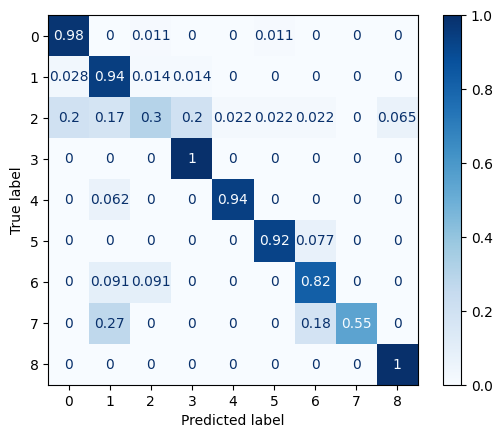

In [ ]:
preds = torch.argmax(torch.tensor(preds_output.predictions), dim=1)

y_pred = preds.numpy()
y_true = y_test.to_numpy()

print("Relatorio de Classificacao:\n", classification_report(y_true, y_pred, target_names=list(y_mapping.keys())))
print("Acuracia:", accuracy_score(y_true, y_pred))

# mostrar a matrix de confusão grafica do modelo sobre todo o dataset
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize='true', cmap='Blues')